# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Importing the essential libraries

In [80]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime

import matplotlib
from scipy.stats import norm
from scipy import stats
import pickle
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, PolynomialFeatures, Normalizer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score, mean_squared_log_error
from sklearn.feature_selection import SequentialFeatureSelector


import warnings
warnings.filterwarnings('ignore')



### Exloratory Data Analysis (EDA) 

### Data Understanding
After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.Data Understanding


#### Read the vehical csv Input file 


In [6]:
#Read input file using pandas read_csv function
cars = pd.read_csv('data/vehicles.csv', encoding = 'latin1') 
cars.info(), cars.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

(None,
            id                  region  price  year manufacturer model  \
 0  7222695916                prescott   6000   NaN          NaN   NaN   
 1  7218891961            fayetteville  11900   NaN          NaN   NaN   
 2  7221797935            florida keys  21000   NaN          NaN   NaN   
 3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
 4  7210384030              greensboro   4900   NaN          NaN   NaN   
 
   condition cylinders fuel  odometer title_status transmission  VIN drive  \
 0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 
   size type paint_color state  
 0  NaN  NaN         NaN    az  
 1  NaN  Na

#### Observations - 
Vehical data with 18 columns including index column-id. Out of 18 columns four columns are numeric and the rest of the14 columns are non-numeric. This dataset contains 426880 entries. Not all columns are populated and some have NaN.


### Preprocessing


In [7]:
# Checking for missing values 
print('Are there any missing values present?',cars.isnull().values.any())
missing_percentage = cars.isnull().sum()*100/len(cars)
missing_value_df = pd.DataFrame({'missing_count': cars.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df = missing_value_df[missing_value_df.missing_count != 0].sort_values(by = 'missing_percentage')
missing_value_df
                 

Are there any missing values present? True


,missing_count,missing_percentage
year,1205,0.282281
transmission,2556,0.598763
fuel,3013,0.705819
odometer,4400,1.030735
model,5277,1.236179
title_status,8242,1.930753
manufacturer,17646,4.133714
type,92858,21.752717
paint_color,130203,30.501078
drive,130567,30.586347



#### Observations - 
The columns, "year", "odometer", "transmission", "model", "fuel","title_status", and "manufacturer" has less than 5% of null values. We can simply drop the Null value rows in these seven columns. Column "size" has morethan 71% of rows with null values. Columns, "cyclinders" and "condition" has > 40% of rows with null values.

### Data cleaning


In [8]:
#dropping rows that has < 5% null values in columns ( "year", "odometer", manufacturer", "model", "fuel","title_status", and "transmission" )
cars = cars.dropna(subset=['year', 'odometer', 'manufacturer', 'model','fuel','title_status','transmission'])

In [9]:
#Dropping unimportant features for determining the features that customer values
#Dropping 'size' feature as this column has 71% of Null values
cars.drop(['id', 'VIN', 'size','state'], axis=1, inplace=True)

In [10]:
#Replace null values with 'unknown' value
cars.fillna('unknown', inplace=True)
#cars.info()

In [11]:
#Check and remove dplicate rows
cars.duplicated().sum()
# Remove duplicates
duplicate = cars[cars.duplicated(keep = 'last')]
duplicate.shape #(0, 13)
cars = cars.drop_duplicates()
#cars.shape

In [12]:
# Check unique values of the features
for i in cars.columns:
  print(i, len(cars[i].value_counts().index))

region 404
price 14679
year 107
manufacturer 41
model 21860
condition 7
cylinders 9
fuel 5
odometer 99827
title_status 6
transmission 3
drive 4
type 14
paint_color 13


In [13]:
model_values = cars['model'].value_counts()
model_values

f-150                6387
silverado 1500       4116
1500                 3322
camry                2496
silverado            2464
                     ... 
scion tc spec           1
6 sedan i touring       1
bens amg gts            1
f250 xlt diesel         1
gand wagoneer           1
Name: model, Length: 21860, dtype: int64

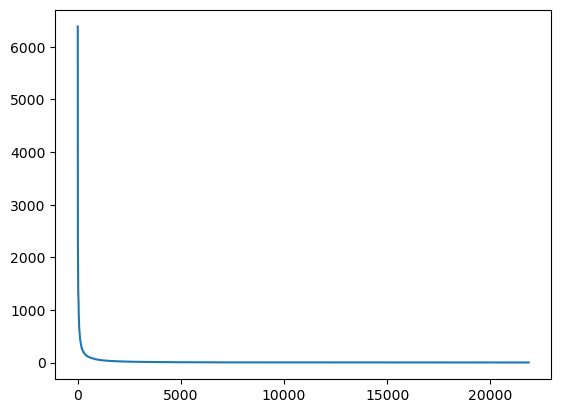

In [14]:
plt.plot(range(len(model_values)), model_values)


In [15]:
model_values = cars['model'].value_counts()
cars['model'] = cars['model'].apply(lambda x: x if str(x) in model_values[:50] else 'others')

In [16]:
region_values = cars['region'].value_counts()
region_values

minneapolis / st paul    2740
portland                 2722
sacramento               2679
seattle-tacoma           2659
denver                   2637
                         ... 
meridian                   19
southwest MS               13
fort smith, AR              8
kansas city                 8
west virginia (old)         7
Name: region, Length: 404, dtype: int64

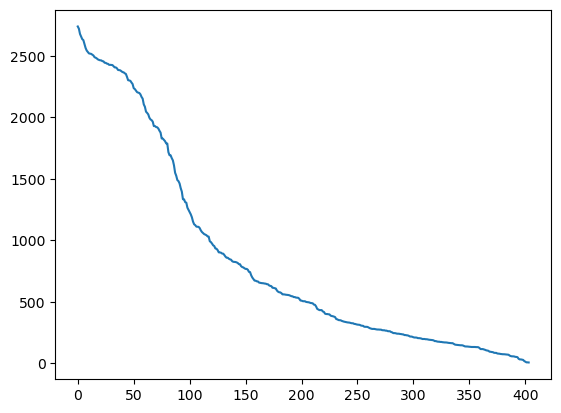

In [17]:
plt.plot(range(len(region_values)), region_values)

In [18]:
region_values = cars['region'].value_counts()
cars['region'] = cars['region'].apply(lambda x: x if str(x) in region_values[:50] else 'others')

In [19]:
manufacturer_values = cars['manufacturer'].value_counts()
manufacturer_values

ford               58558
chevrolet          45189
toyota             28244
honda              17657
jeep               15478
nissan             15273
ram                14240
gmc                13912
bmw                12577
dodge              10805
mercedes-benz       9864
hyundai             8229
volkswagen          8164
subaru              8010
lexus               7005
kia                 6812
audi                6683
cadillac            5748
acura               5403
chrysler            4939
buick               4667
mazda               4585
infiniti            4265
lincoln             3670
volvo               2875
mitsubishi          2746
mini                2033
pontiac             1988
jaguar              1791
rover               1543
porsche             1136
mercury              991
saturn               918
alfa-romeo           854
tesla                781
fiat                 685
harley-davidson      106
ferrari               67
datsun                61
aston-martin          22


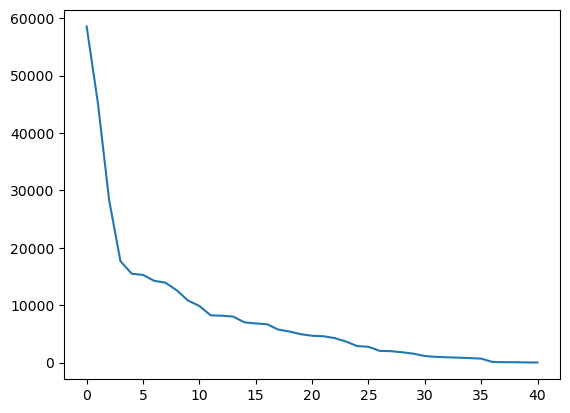

In [20]:
plt.plot(range(len(manufacturer_values)), manufacturer_values)

In [21]:
cars['manufacturer'] = cars['manufacturer'].apply(lambda x: x if str(x) in manufacturer_values[:20] else 'others')

In [22]:
for i in cars.columns:
  print(i, len(cars[i].value_counts().index))

region 51
price 14679
year 107
manufacturer 21
model 51
condition 7
cylinders 9
fuel 5
odometer 99827
title_status 6
transmission 3
drive 4
type 14
paint_color 13


#### Perform Data visualization - 
Understanding the outliers and correlations of numerical features
Understand the manufacturer, condition incluence on price
Understand condition of the car influence on price
Fuel+ condition influence on price

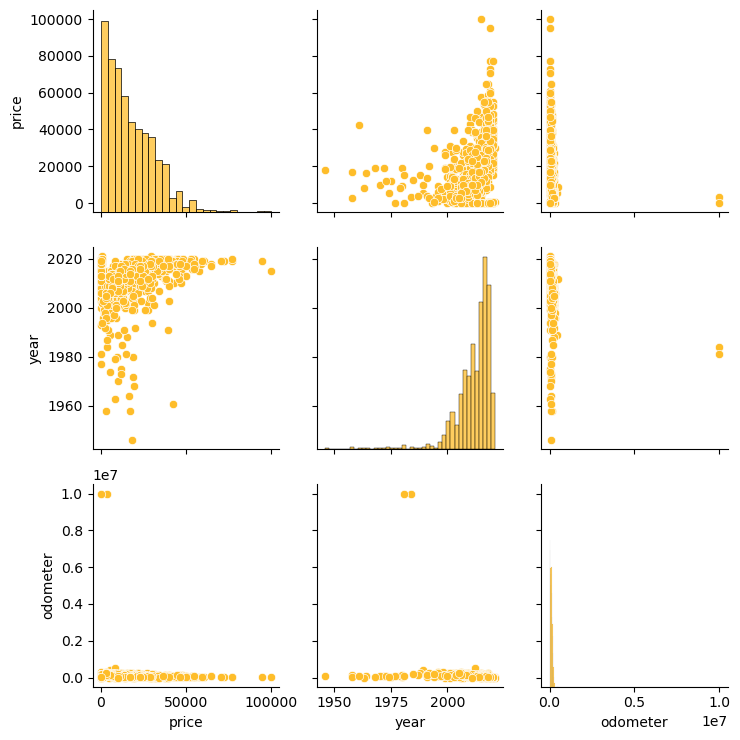

In [23]:
sample_data = cars.sample(1000)
sns.set_palette('plasma_r')
sns.pairplot(sample_data)
plt.tight_layout()
plt.show()

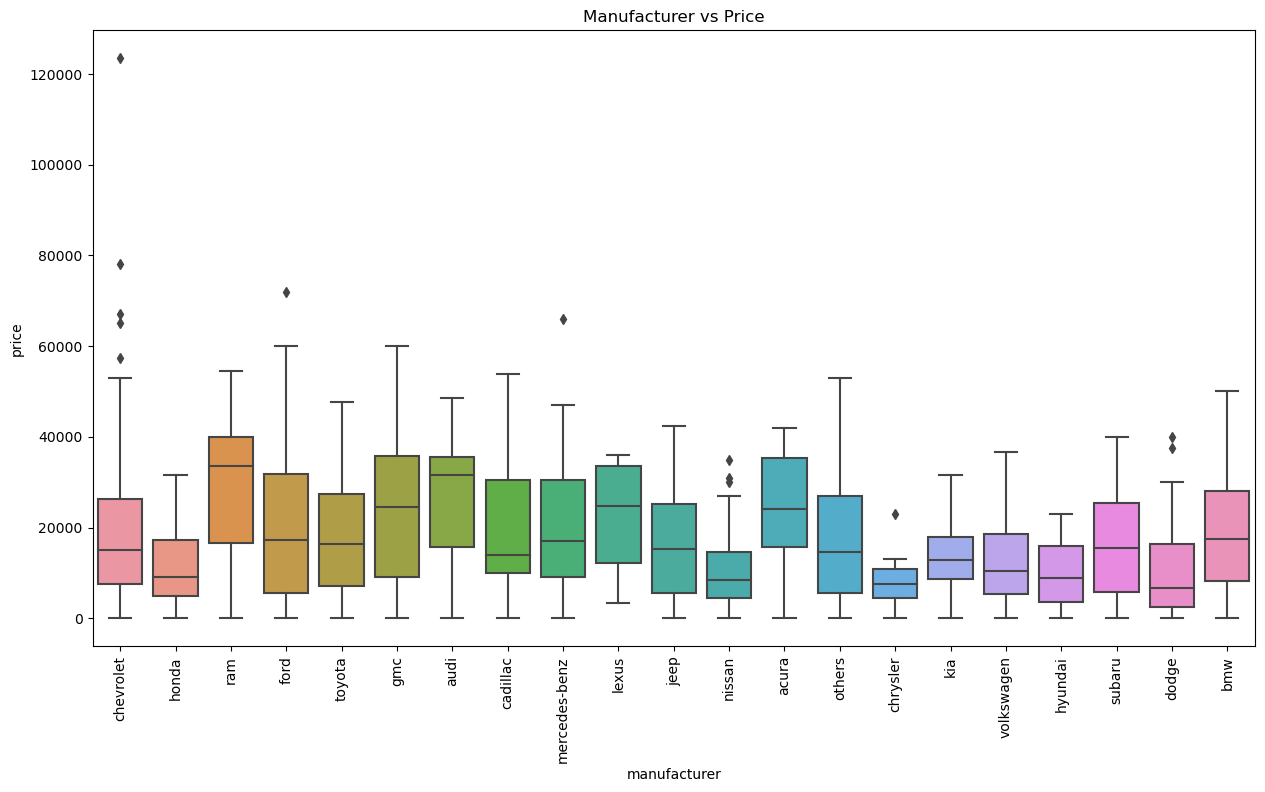

In [27]:
# Visualization price vs manufacturer cars
sample_data = cars.sample(1000)
fig = plt.figure(figsize=(15, 8))
sns.boxplot(data=sample_data, x='manufacturer', y='price')
plt.title('Manufacturer vs Price')
plt.xticks(rotation=90)
plt.show()

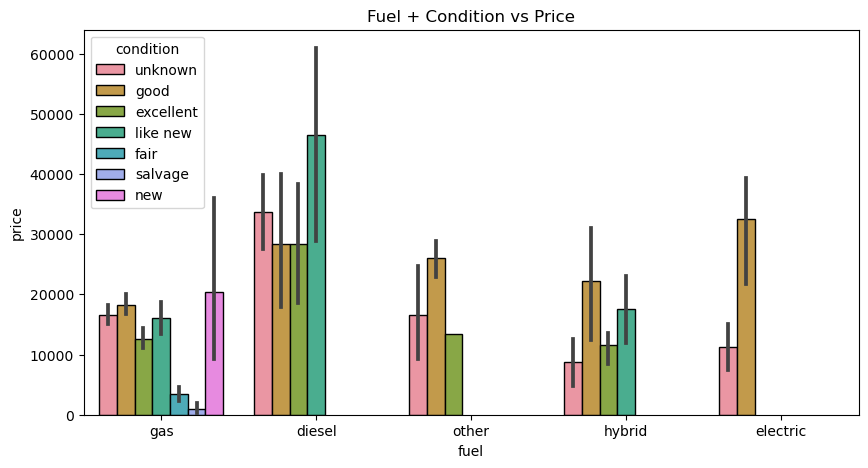

In [25]:
sample_data = cars.sample(1000)
plt.figure(figsize=(10,5))
sns.barplot(x='fuel',y='price', ec ='k', hue='condition',data=sample_data)
plt.title('Fuel + Condition vs Price')
plt.show()

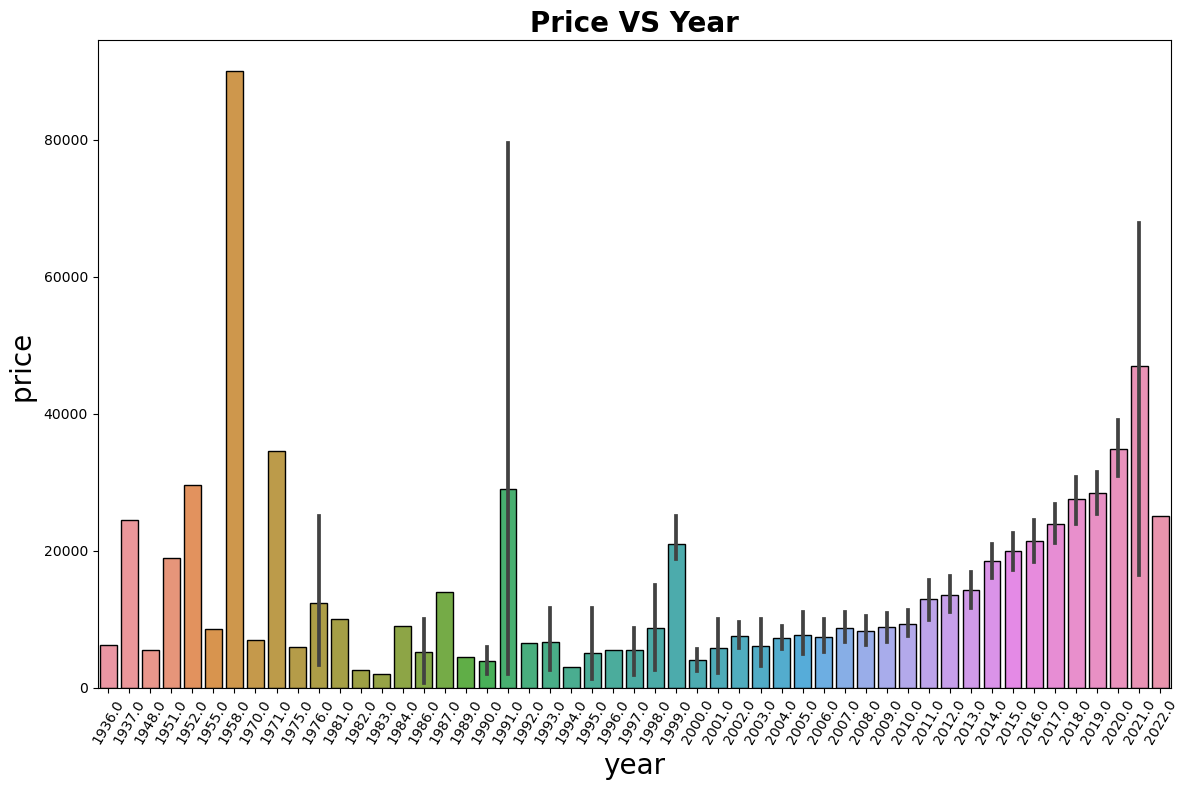

In [28]:
sample_data = cars.sample(1000)
sns.set_palette('summer_r')
plt.figure(figsize =(12,8))
sns.barplot(y=sample_data['price'],x=sample_data['year'], ec = 'k')
plt.title("Price VS Year",fontsize=20,fontweight ='bold')
plt.xlabel('year',fontsize = 20)
plt.xticks(rotation=60)
plt.ylabel('price ',fontsize = 20)
plt.tight_layout()
plt.show()

In [33]:
#Is there a significant relationship between a brand and their likelihood to price ?
brand_price = cars.groupby('manufacturer')['price'].mean().sort_values(ascending=False)
fig = px.bar(brand_price , color = brand_price.index )
fig.show()

In [34]:
#Is there a significant relationship between a region (location) and their likelihood to price?
sample_data = cars.sample(5000)
loc_price = sample_data.groupby('region')['price'].mean().sort_values(ascending=False)
fig = px.bar(loc_price , color = loc_price.index )
fig.show()


#### Observations - 
There are severe outliers for "price" and "odometer columns
"Price" distribution is skewed left
Condition of the car influencing the price
Newer (latest years) cars  year have high price.However some of very old (vintage?) cars showing high prices as well
Top 5 high price regions are observed - Tucson, Orange County, Baltimore, albuquerque
Top 5 car manufactureres with high price cars - Mercedes Benz, totyota, jeep, gmc


#### No duplicate rows found

In [35]:
# Check and remove duplicates
cars.duplicated().sum()
# Remove duplicates
duplicate = cars[cars.duplicated(keep = 'last')]
#duplicate.shape #(2197, 14)
cars = cars.drop_duplicates()
cars.shape

(261254, 14)

In [36]:
paint_color_values = cars['paint_color'].value_counts()
type_values = cars['type'].value_counts()
condition_values = cars['condition'].value_counts()
cylinders_values = cars['cylinders'].value_counts()
drive_values = cars['drive'].value_counts()

print("paint_color unique values : ", paint_color_values)
print("type unique values : ", type_values)
print("condition unique values : ", condition_values)
print("cylinders unique values : ", cylinders_values)
print("drive unique values : ", drive_values)

paint_color unique values :  unknown    73813
white      47020
black      38975
silver     28193
blue       20227
red        18636
grey       17586
green       4960
custom      4612
brown       4354
yellow      1283
orange      1122
purple       473
Name: paint_color, dtype: int64
type unique values :  unknown        60411
sedan          56131
SUV            49601
pickup         22139
truck          20105
coupe          10988
other          10761
hatchback       9889
wagon           6732
van             5169
convertible     4921
mini-van        3674
offroad          496
bus              237
Name: type, dtype: int64
condition unique values :  unknown      101098
good          68672
excellent     68368
like new      15952
fair           5745
new             904
salvage         515
Name: condition, dtype: int64
cylinders unique values :  unknown         98566
6 cylinders     59732
4 cylinders     55237
8 cylinders     44486
5 cylinders      1282
10 cylinders      834
other             632

In [37]:
for i in cars.columns:
  print(i, len(cars[i].value_counts().index))

region 51
price 14679
year 107
manufacturer 21
model 51
condition 7
cylinders 9
fuel 5
odometer 99827
title_status 6
transmission 3
drive 4
type 14
paint_color 13


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [38]:
#Analyse numerical features- Price, year and odometer
cars.describe()

,price,year,odometer
count,2.612540e+05,261254.000000,2.612540e+05
mean,8.486287e+04,2010.469803,1.043217e+05
std,1.398083e+07,9.529523,2.062109e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.450000e+03,2007.000000,4.564500e+04
50%,1.185000e+04,2013.000000,9.446650e+04
75%,2.259000e+04,2016.000000,1.405820e+05
max,3.736929e+09,2022.000000,1.000000e+07


#### Observations - 
By looking at the mean, std, 25% and 75% stats, it appears Price column has severe outliers and there is an opportunity to filter out old, irrelevant entries.(years < 1996).
Visualizing data for further understanding of the data for cleaning.

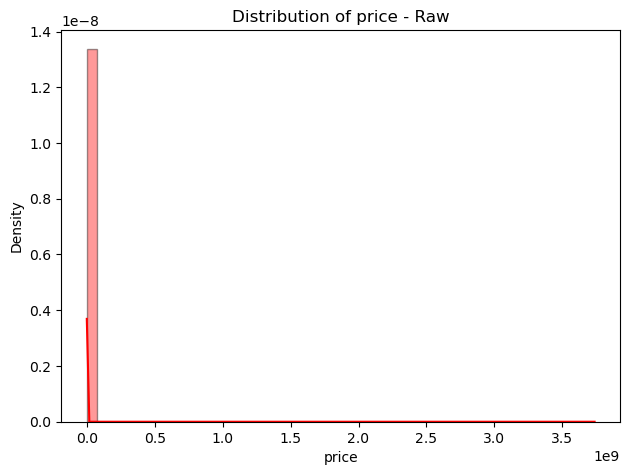

In [39]:
#visualize price distribution
sns.distplot(cars.price, color = 'red', hist_kws={'edgecolor': 'k'})
plt.tight_layout()
plt.title("Distribution of price - Raw")

plt.show()

In [40]:
# Identify the count of outliers for price
price_outliers = cars.query('price > 100000').shape[0]
price_l_outliers = cars.query('price < 100').shape[0]

print('Total records in the dataset: ', cars.shape[0])
print('Total records with price more than 100,000: ', price_outliers)
print('Percent of price outliers: ', '%.2f' % (price_outliers/cars.shape[0]*100), '%')
print('Total records with price less than 100: ', price_l_outliers)
print('Percent of price outliers: ', '%.2f' % (price_l_outliers/cars.shape[0]*100), '%')

Total records in the dataset:  261254
Total records with price more than 100,000:  324
Percent of price outliers:  0.12 %
Total records with price less than 100:  18893
Percent of price outliers:  7.23 %


In [41]:
price_percentile25 = cars['price'].quantile(0.25)
price_percentile75 = cars['price'].quantile(0.75)
price_iqr = price_percentile75 - price_percentile25
price_upper_limit = price_percentile75 + 5.38 * price_iqr
price_lower_limit = cars['price'].quantile(0.0725)

print(price_upper_limit)
print(price_lower_limit)

114803.2
101.0


In [42]:
cars_clean = cars[(cars['price'] < price_upper_limit) & (cars['price'] >= price_lower_limit)]

In [43]:
# Identify the count of outliers for odometer (milage) 
milage_h_outliers = cars.query('odometer > 300000').shape[0]
milage_l_outliers = cars.query('odometer <= 0').shape[0]

print('Total records in the dataset: ', cars.shape[0])
print('Total records with odometer more than 300,000: ', milage_h_outliers)
print('Percent of odometer outliers: ', '%.2f' % (milage_h_outliers/cars.shape[0]*100), '%')
print('Total records with odometer value as zero: ', milage_l_outliers)
print('Percent of odometer outliers: ', '%.2f' % (milage_l_outliers/cars.shape[0]*100), '%')

Total records in the dataset:  261254
Total records with odometer more than 300,000:  1661
Percent of odometer outliers:  0.64 %
Total records with odometer value as zero:  726
Percent of odometer outliers:  0.28 %


In [44]:
cars_clean.shape

(242071, 14)

In [45]:
odometer_upper_limit = 300000
odometer_lower_limit = 0
cars_clean = cars_clean[(cars_clean['odometer'] < odometer_upper_limit) & (cars_clean['odometer'] > odometer_lower_limit)]

In [46]:
# Identify the count of cars year made < 1996 - cars age (year) 
age_outliers = cars.query('year < 1996').shape[0]

print('Total records in the dataset: ', cars.shape[0])
print('Total records with year older than 1996: ', age_outliers)
print('Percent of older year cars: ', '%.2f' % (age_outliers/cars.shape[0]*100), '%')

Total records in the dataset:  261254
Total records with year older than 1996:  12036
Percent of older year cars:  4.61 %


In [47]:
cars_clean['year'] = cars_clean['year'].astype(int)
cars_clean = cars_clean[cars_clean['year'] > 1996]
cars_clean['years_old'] = cars_clean['year'].max() - cars_clean['year']
cars_clean.drop(['year'], axis = 1, inplace = True)
cars_clean.describe()
#cars_clean.shape

,price,odometer,years_old
count,227719.000000,227719.000000,227719.000000
mean,16983.314704,99359.473922,10.070302
std,13699.083039,61404.785683,5.479621
min,101.000000,1.000000,0.000000
25%,6795.000000,47267.000000,6.000000
50%,13000.000000,96576.000000,9.000000
75%,23995.000000,142000.000000,14.000000
max,112999.000000,299999.000000,25.000000


In [48]:
cars_clean.head(5)

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,years_old
27,others,33590,gmc,others,good,8 cylinders,gas,57923.0,clean,other,unknown,pickup,white,8
28,others,22590,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,unknown,pickup,blue,12
29,others,39590,chevrolet,others,good,8 cylinders,gas,19160.0,clean,other,unknown,pickup,red,2
30,others,30990,toyota,others,good,8 cylinders,gas,41124.0,clean,other,unknown,pickup,red,5
31,others,15000,ford,others,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,9


In [49]:
cars_clean['odometer'] = cars_clean['odometer'].astype(int)

In [50]:
cars_clean.head(5)

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,years_old
27,others,33590,gmc,others,good,8 cylinders,gas,57923,clean,other,unknown,pickup,white,8
28,others,22590,chevrolet,silverado 1500,good,8 cylinders,gas,71229,clean,other,unknown,pickup,blue,12
29,others,39590,chevrolet,others,good,8 cylinders,gas,19160,clean,other,unknown,pickup,red,2
30,others,30990,toyota,others,good,8 cylinders,gas,41124,clean,other,unknown,pickup,red,5
31,others,15000,ford,others,excellent,6 cylinders,gas,128000,clean,automatic,rwd,truck,black,9


##### Data Visualization before and after cleaning the data

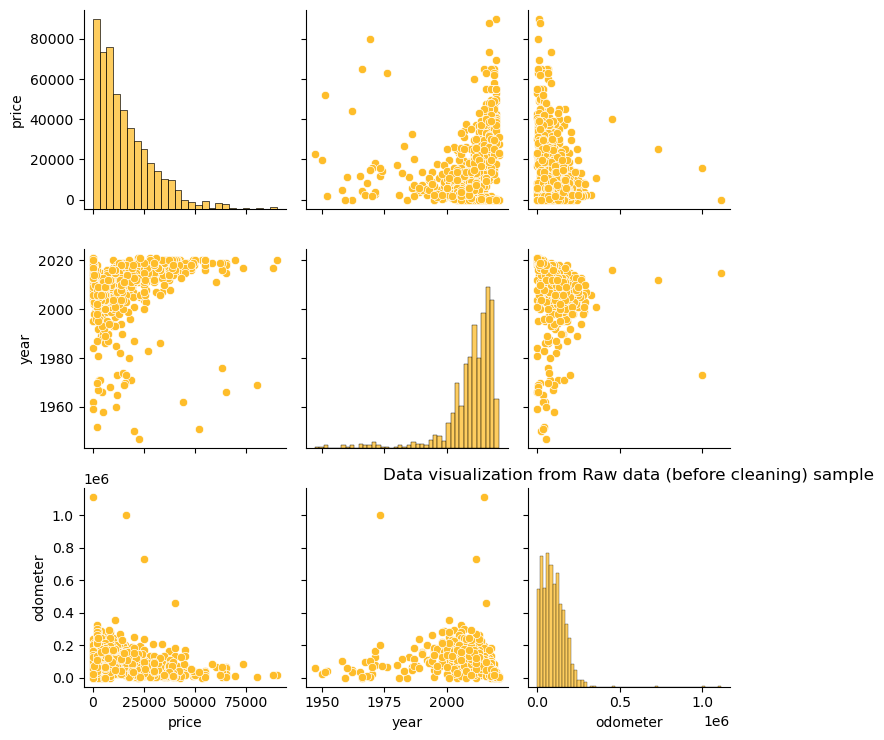

In [55]:
sample_data = cars.sample(1000)
sns.set_palette('plasma_r')
sns.pairplot(sample_data)
plt.title('Data visualization from Raw data (before cleaning) sample')
plt.tight_layout()
plt.show()

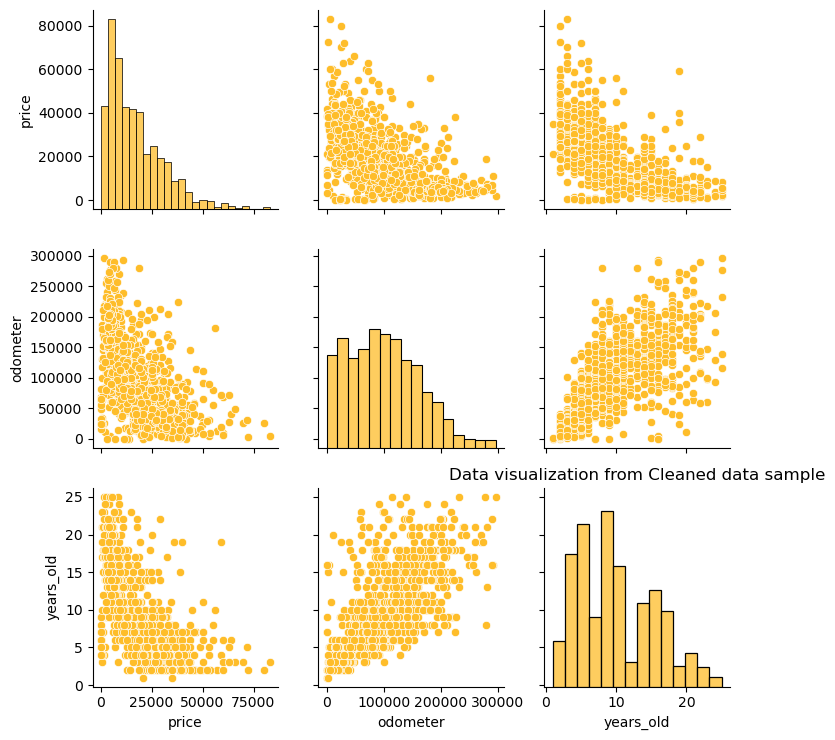

In [56]:
sample_data = cars_clean.sample(1000)
sns.set_palette('plasma_r')
sns.pairplot(sample_data)
plt.title('Data visualization from Cleaned data sample')
plt.tight_layout()
plt.show()

##### Data Transformation: Using OrdinalEncoder, LabelEncoder and OneHotEncoder

In [102]:
cars_transformed = cars_clean.copy()

cars_transformed.columns


Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'years_old'],
      dtype='object')

In [58]:
pipe_categorical = Pipeline(
    steps = [('ordinal_encoder', OrdinalEncoder(categories = [[ 'salvage', 'fair', 'unknown', 'good', 'excellent', 'like new', 'new']])),
             ('one_hot_encoder', OneHotEncoder(sparse = False, drop = 'first'))]
)

pipe_numerical = Pipeline(
    steps = [('standard_scaler', StandardScaler())]
)

column_transformer = ColumnTransformer(transformers = [
    ('condition_pipe_trans', pipe_categorical['ordinal_encoder'], ['condition']),
    ('categorical_pipe_trans', pipe_categorical['one_hot_encoder'], ['model', 'manufacturer', 'fuel', 'cylinders','title_status', 'transmission', 'drive', 'type', 'region','paint_color']),
    ('numerical_pipe_trans', pipe_numerical, ['odometer','years_old'])
])

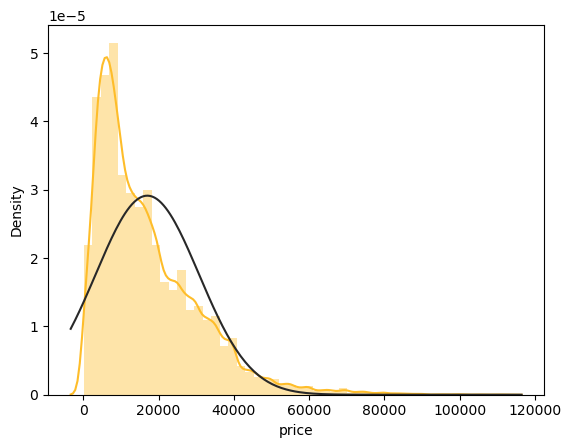

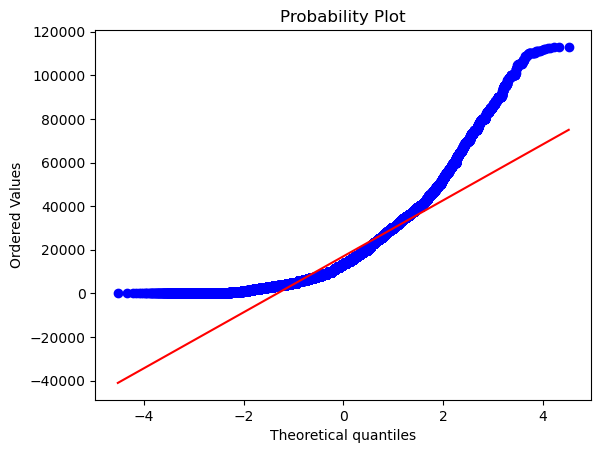

In [59]:
#transformed histogram and normal probability plot
sns.distplot(cars_clean['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(cars_clean['price'], plot=plt)

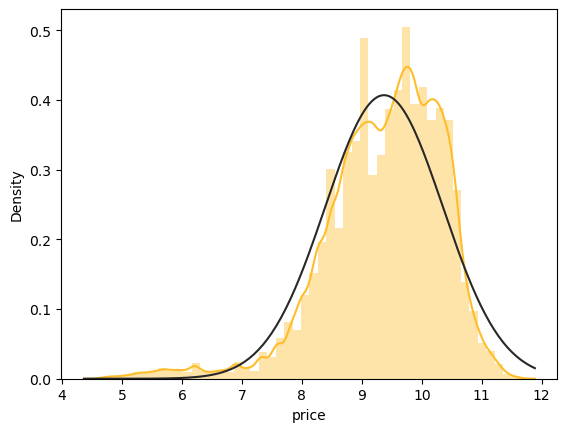

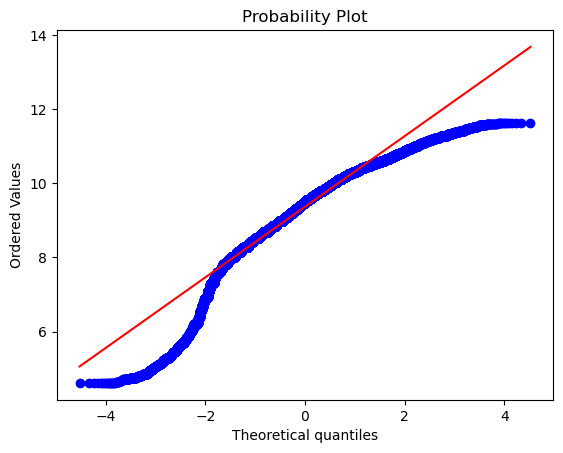

In [60]:
#applying log transformation
cars_transformed['price'] = np.log(cars_transformed['price'])
#transformed histogram and normal probability plot
sns.distplot(cars_transformed['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(cars_transformed['price'], plot=plt)

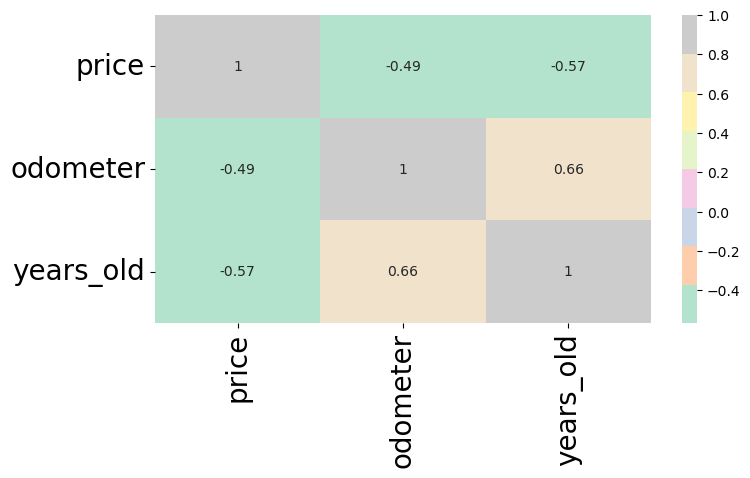

In [61]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.set_palette('summer_r')
fig = sns.heatmap(cars_transformed.corr(), annot=True, cmap='Pastel2')
fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 20)
fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 20);

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [62]:
#Split data - Training dataset and Test dataset (test data set size 20%)

X_train, X_test, y_train, y_test = train_test_split(cars_transformed.drop(['price'], axis = 1), cars_transformed['price'], random_state = 42, test_size = .2)

In [63]:
X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.fit_transform(X_test)

print(type(X_train_transformed))
print(type(X_test_transformed))

print(pd.DataFrame(X_train_transformed).shape)
print(pd.DataFrame(X_test_transformed).shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(182175, 170)
(45544, 170)


In [64]:
def result(y_test, y_pred):
    r=[]
    r.append('%.4f' % r2_score(y_test,y_pred))
    r.append('%.4f' % (r2_score(y_test,y_pred)*100))
    r.append('%.2f' % mean_squared_error(y_test, y_pred))
    r.append('%.2f' % mean_absolute_error(y_test, y_pred))
    r.append('%.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
    
    return (r)

#dataframe that store the performance of each model
score_data = pd.DataFrame(index=['R2 Score', 'Accuracy(%)', 'Mean Squared Error', 'Mean Absolute Error', 'Root MSE'])

**Linear Regression**

In [67]:
LR = LinearRegression()
LR.fit(X_train_transformed, y_train)
y_pred = LR.predict(X_test_transformed)


In [68]:
R2_score = r2_score(y_test, y_pred)*100
score_lr = result(y_test, y_pred)
score_data['Linear Regression'] = score_lr
print('R2_score: ', score_lr[0])
print('Mean squared error: ', score_lr[2])
print('Mean absolute error: ', score_lr[3])
print('Root mean squared error: ', score_lr[4])

R2_score:  0.5401
Mean squared error:  0.44
Mean absolute error:  0.39
Root mean squared error:  0.67


**Ridge Regression**

In [69]:
RR = Ridge(alpha=20.336, solver='auto')
RR.fit(X_train_transformed, y_train)
y_pred = RR.predict(X_test_transformed)


In [70]:
score_rr = result(y_test, y_pred)
score_data['Ridge Regression'] = score_rr
print('R2 score: ', score_rr[0])
print('Mean squared error: ', score_rr[2])
print('Mean absolute error: ', score_rr[3])
print('Root mean squared error: ', score_rr[4])

R2 score:  0.5400
Mean squared error:  0.44
Mean absolute error:  0.39
Root mean squared error:  0.67


**Lasso Regression**

In [71]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_transformed, y_train)
y_pred = lasso.predict(X_test_transformed)


In [72]:
score_lasso = result(y_test, y_pred)
score_data['Lasso Regression'] = score_lasso
print('R2 score: ', score_lasso[0])
print('Mean squared error: ', score_lasso[2])
print('Mean absolute error: ', score_lasso[3])
print('Root mean squared error: ', score_lasso[4])

R2 score:  0.5397
Mean squared error:  0.44
Mean absolute error:  0.38
Root mean squared error:  0.67


#### Model using GridSearchCV Hyper parameter tuning

In [76]:
cars_df3 = cars_clean

In [85]:
def tune_and_evaluate(model,param_grid):
    
    #hyperparameter tunning                 
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='r2')
    grid_search.fit(X3_train,y3_train);
    model = grid_search.best_estimator_
    print("Best Parameters: ",grid_search.best_params_)
    print("Mean of cross validation scores: ",grid_search.best_score_)
    print('--------------------------------------')
                      
    #measuring accuracy
    print("Training set Accuracy:",round(model.score(X3_train,y3_train),4)*100)
    print("Testing set Accuracy:",round(model.score(X3_test,y3_test),4)*100)
    print("MSE: ", mean_squared_error(y_test,model.predict(X3_test)))
    
    return model

In [86]:
features = cars_df3.columns.drop(['price'])
target = 'price'

X3 = cars_df3[features]
y3 = cars_df3[target]

num_features = X3.select_dtypes('number').columns
cat_features = X3.select_dtypes('object').columns

X3_train , X3_test , y3_train ,y3_test = train_test_split(X3,y3,test_size=0.2,random_state=42)

In [87]:
#numerical pipeline
num_pipeline = make_pipeline(
                SimpleImputer(),
                StandardScaler(),
                PolynomialFeatures(degree=2)
)
#categorical pipeline
cat_pipeline = make_pipeline(
                SimpleImputer(strategy='most_frequent'),
                OneHotEncoder()
                
)
#full pipeline
preprocessor = make_column_transformer(
                (num_pipeline,num_features),
                (cat_pipeline,cat_features)
)

In [88]:
#Model Building
lin_reg = make_pipeline(
    preprocessor,
    LinearRegression()
)
#hyperparameter tunning
param_grid = {'columntransformer__pipeline-1__polynomialfeatures__degree':[3,4,5,6]}
lin_reg = tune_and_evaluate(lin_reg, param_grid)

Best Parameters:  {'columntransformer__pipeline-1__polynomialfeatures__degree': 6}
Mean of cross validation scores:  0.6854710488679812
--------------------------------------
Training set Accuracy: 68.65
Testing set Accuracy: 68.64
MSE:  416405033.88424087


In [89]:
#Model Building
ridge = make_pipeline(
    preprocessor,
    Ridge()
)
#hyperparameter tunning
param_grid = {
    'ridge__alpha':[0.1,1,10, 20, 100],
    'columntransformer__pipeline-1__polynomialfeatures__degree':[3,4,5,6]
}
ridge = tune_and_evaluate(ridge, param_grid)

Best Parameters:  {'columntransformer__pipeline-1__polynomialfeatures__degree': 6, 'ridge__alpha': 0.1}
Mean of cross validation scores:  0.6853740777017346
--------------------------------------
Training set Accuracy: 68.63
Testing set Accuracy: 68.61
MSE:  416355422.14684427


In [91]:
#Model Building
lasso = make_pipeline(
    preprocessor,
    Lasso()
)

#Hyperparameter Tunning
param_grid={
    "lasso__alpha":[0.01, 0.1, 1, 10, 100],
    "columntransformer__pipeline-1__polynomialfeatures__degree":[3,4,5,6]
}
lasso = tune_and_evaluate(lasso, param_grid)

KeyboardInterrupt: 

In [93]:
regression_models = [lin_reg,ridge]#,lasso]
score_train = list()
score_test = list()

for m in regression_models : 
    score_train.append(m.score(X3_train,y3_train))
    score_test.append(m.score(X3_test,y3_test))

In [94]:
model_names = ['Linear Regression','Ridge Regressor']#,'Lasso Regressor']

scores = pd.DataFrame([model_names,score_train,score_test])
scores

,0,1
0,Linear Regression,Ridge Regressor
1,0.686456,0.686303
2,0.686366,0.686069


In [95]:
scores = scores.transpose()
scores.columns = [ 'Model','Training Set Accuracy','Testing set Accuracy']
scores

,Model,Training Set Accuracy,Testing set Accuracy
0,Linear Regression,0.686456,0.686366
1,Ridge Regressor,0.686303,0.686069


Text(0, 0.5, 'Trainig Set Accuracy')

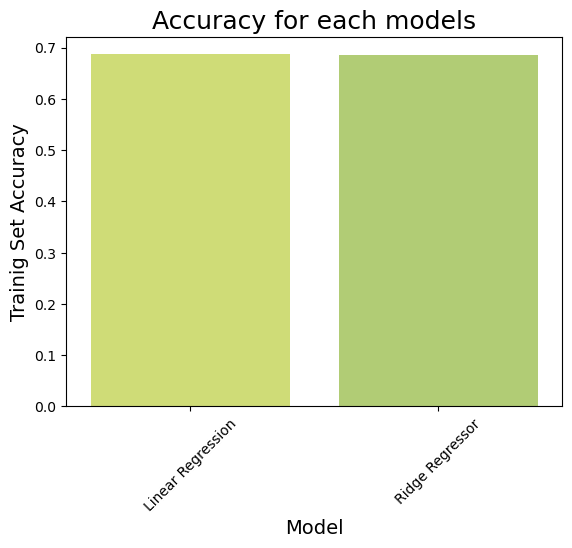

In [96]:
sns.barplot(data=scores, x='Model', y='Training Set Accuracy')
plt.title('Accuracy for each models', size=18)
plt.xticks(rotation=45,size=10)
plt.xlabel('Model',size=14)
plt.ylabel('Trainig Set Accuracy',size=14)

Text(0, 0.5, 'Testing Set Accuracy')

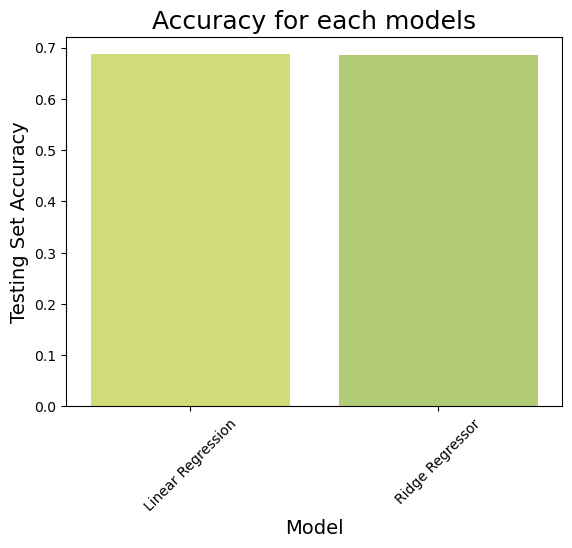

In [97]:
sns.barplot(data=scores, x='Model', y='Testing set Accuracy')
plt.title('Accuracy for each models', size=18)
plt.xticks(rotation=45,size=10)
plt.xlabel('Model',size=14)
plt.ylabel('Testing Set Accuracy',size=14)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [98]:
score_data

,Linear Regression,Ridge Regression,Lasso Regression
R2 Score,0.5401,0.5400,0.5397
Accuracy(%),54.0097,54.0019,53.9717
Mean Squared Error,0.44,0.44,0.44
Mean Absolute Error,0.39,0.39,0.38
Root MSE,0.67,0.67,0.67


In [99]:
for i in score_data.columns:
  score_data[i] = score_data[i].astype(float)
model_accuracy = score_data.loc['Accuracy(%)']

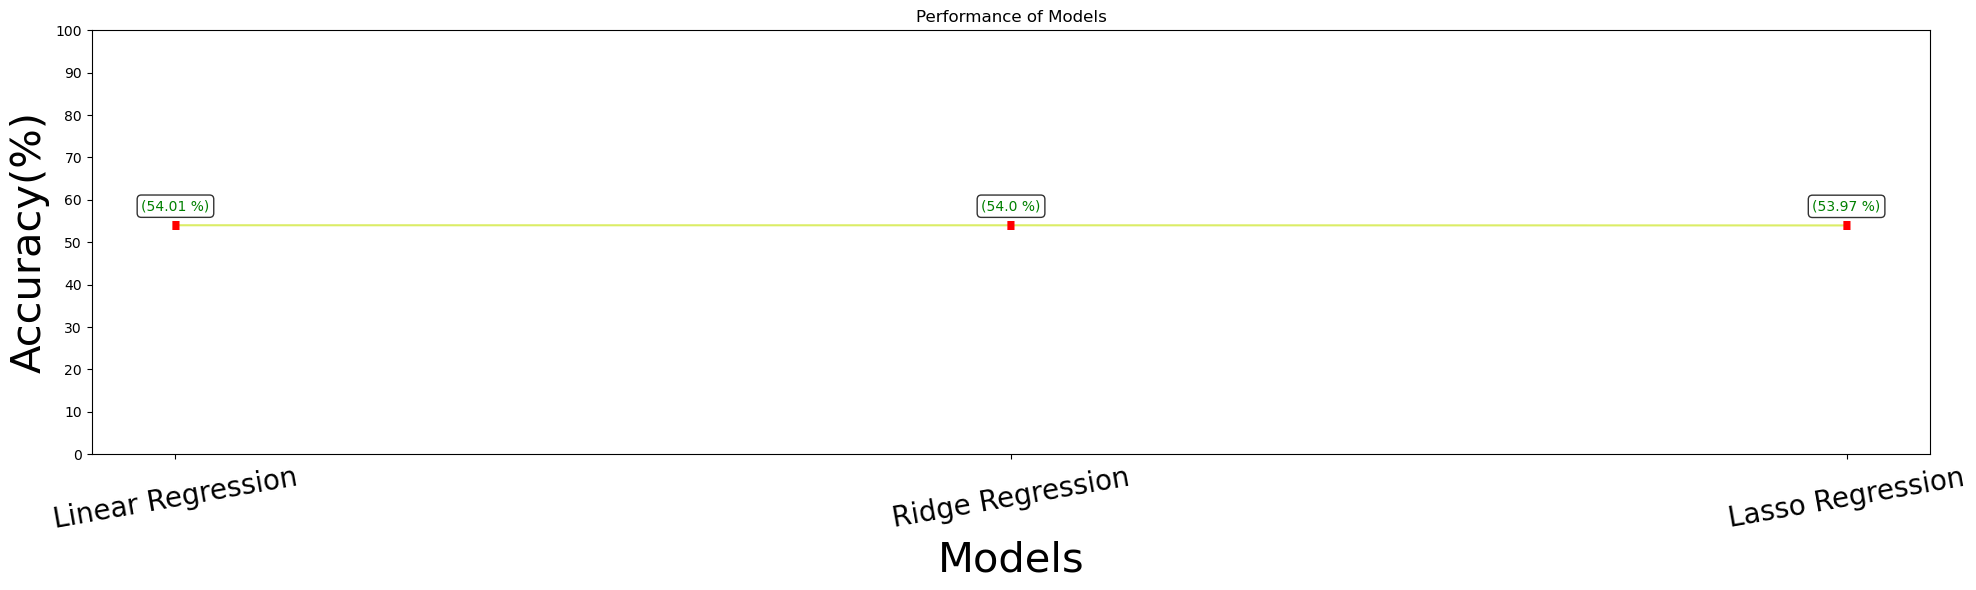

In [100]:
x=list(range(len(model_accuracy)))
y=list(range(0,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("Accuracy(%)",fontsize=30)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy[a]
    val="("+str(round(model_accuracy[a],2))+" %)"
    plt.text(a, b+4.5, val,horizontalalignment='center',verticalalignment='center',color='green',bbox=props)
    plt.text(a, b+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
#plt.savefig('Overall-Performance.jpg',dpi=600)
plt.show()

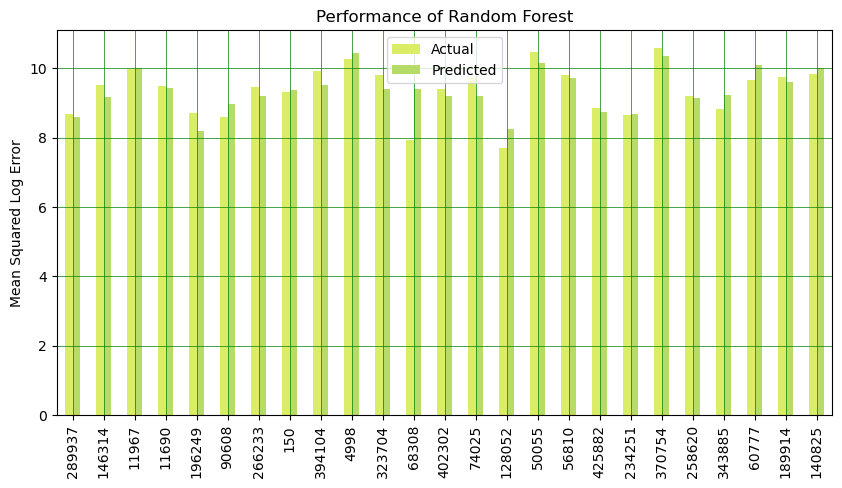

In [101]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.sample(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.savefig('Random-Forest-Performance.jpg')
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

#### Here are some key observations related to used cars: 
- The primary factors that affect the price of a used car are its mileage and age. Other factors that play a role in determining the price include the car's condition, options, model, location, and color. 
- The top 5 regions with the highest volume of used car sales are Minneapolis/St. Paul, Portland, Sacramento, Seattle-Tacoma, and Denver. 
- The top 5 manufacturers whose cars are found in the used car inventory are Ford, Chevrolet, Toyota, Honda, and Jeep. 
- The top-priced used cars, on average, belong to the manufacturers Mercedes-Benz, Toyota, Jeep, Ford, and GMC. 
- The top 5 car colors are white, black, silver, blue, and red. - Cars with clean status and low mileage are sold at higher prices compared to salvage or high mileage cars. 
- Sedans and SUVs are the most commonly sold types of cars. 
- It's worth noting that new or recent year cars are usually priced higher than vintage cars.


#### Challenges:

The data provided for the model has a lot of missing values for key features, making it challenging to achieve higher accuracy. Additionally, due to limited computational power for tuning the model, using GridSearchCV (especially for LassoRegression), and having limited options for AI/ML algorithms, building an effective model has become even more difficult.

#### Recommendations & Next steps:

Our model can be integrated into a standalone web application that allows employees of our clients to log in and get a recommended sale price for new used car inventory. Although the current accuracy of the model is only 69%, with enough computational resources, it can be further tuned to achieve higher accuracy. Our client can utilize the important data observations mentioned above to improve business strategies, such as managing used car inventory and procurement.

#### Conclusion

Python's powerful libraries make it perfect for analyzing used car prices. By preprocessing, cleaning, visualizing, and modeling, we gain insights and make accurate predictions. This empowers informed decisions for buyers and sellers.